In [1]:
# Import Required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

In [2]:
# Loading dataset
####dataset = load_digits()
 
# X contains the data and y contains the labels
###X, y = dataset.data, dataset.target

In [3]:
df = pd.read_csv("Engineering_graduate_salary Mod.csv")
X = df.loc[:, ['12graduation', '12percentage', 'collegeGPA', 'CollegeCityID', 'GraduationYear']]
y = df.loc[:, ['Salary']]

C:\Users\romer\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\romer\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\romer\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\romer\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rave

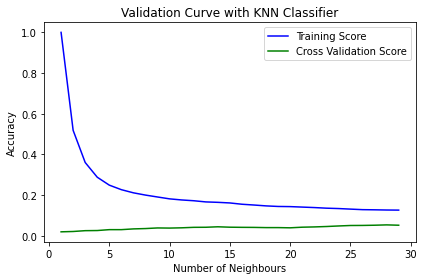

In [6]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 30, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), X, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()